In [1]:
%load_ext autoreload
%autoreload 2

import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from astropy.modeling.physical_models import BlackBody
import astropy.units as u
import astropy.constants as const


environments = [NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43),
                NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.190, line_velocity= 0.190, t_d=3.41)]

                
#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    #plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    

 '51S' '53D' '53F' '53G' '53P' '53S' '61D' '61F' '61G' '61H' '61P' '61S'
 '63D' '63F' '63G' '63H' '63P' '63S']
Inserting ones for missing states
[<NLTE.NLTE_model.CollisionProcess object at 0x7fa38563dab0>, <NLTE.NLTE_model.RadiativeProcess object at 0x7fa3ec6193c0>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7fa383cf52d0>, <NLTE.NLTE_model.RecombinationProcess object at 0x7fa383cf5900>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7fa383cf61d0>]
[<NLTE.NLTE_model.CollisionProcess object at 0x7fa383c43b20>, <NLTE.NLTE_model.RadiativeProcess object at 0x7fa383e77400>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7fa383cf4370>, <NLTE.NLTE_model.RecombinationProcess object at 0x7fa383e759c0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7fa383e75150>]


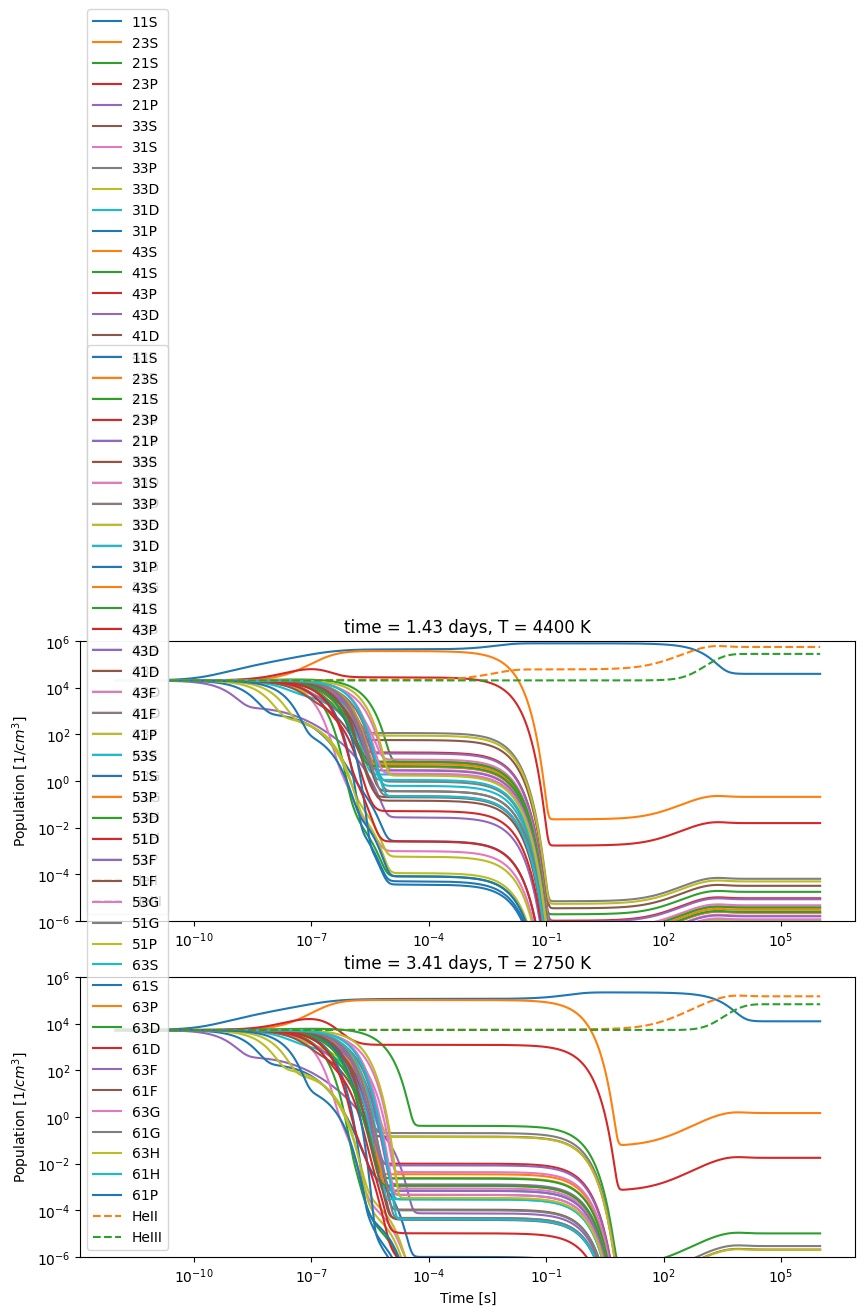

In [2]:
fig, axes = plt.subplots(2, 1, figsize=(10,8))
states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= 6)
for environment, ax in zip(environments, axes):
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
    print(nlte_solver.processes)
    t, y = nlte_solver.solve(np.geomspace(1e-12,1000000, 1000))
    ax.plot(t, y.T[:, :-2], label = states.names);
    ax.plot(t, y.T[:, -2:], linestyle="--", label  = ["HeII", "HeIII"]);
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel(r"Population $[1/cm^3]$")
    ax.set_ylim(1e-6, 1e6)
    ax.legend(loc="lower left")
    ax.set_title(f"time = {environment.t_d} days, T = {environment.T_phot} K")
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)
ax.set_xlabel("Time [s]")
plt.savefig("plots/time_evolution.png", dpi=300, bbox_inches="tight")

Inserting ones for missing states
 '51S' '53D' '53F' '53G' '53P' '53S']
Inserting ones for missing states


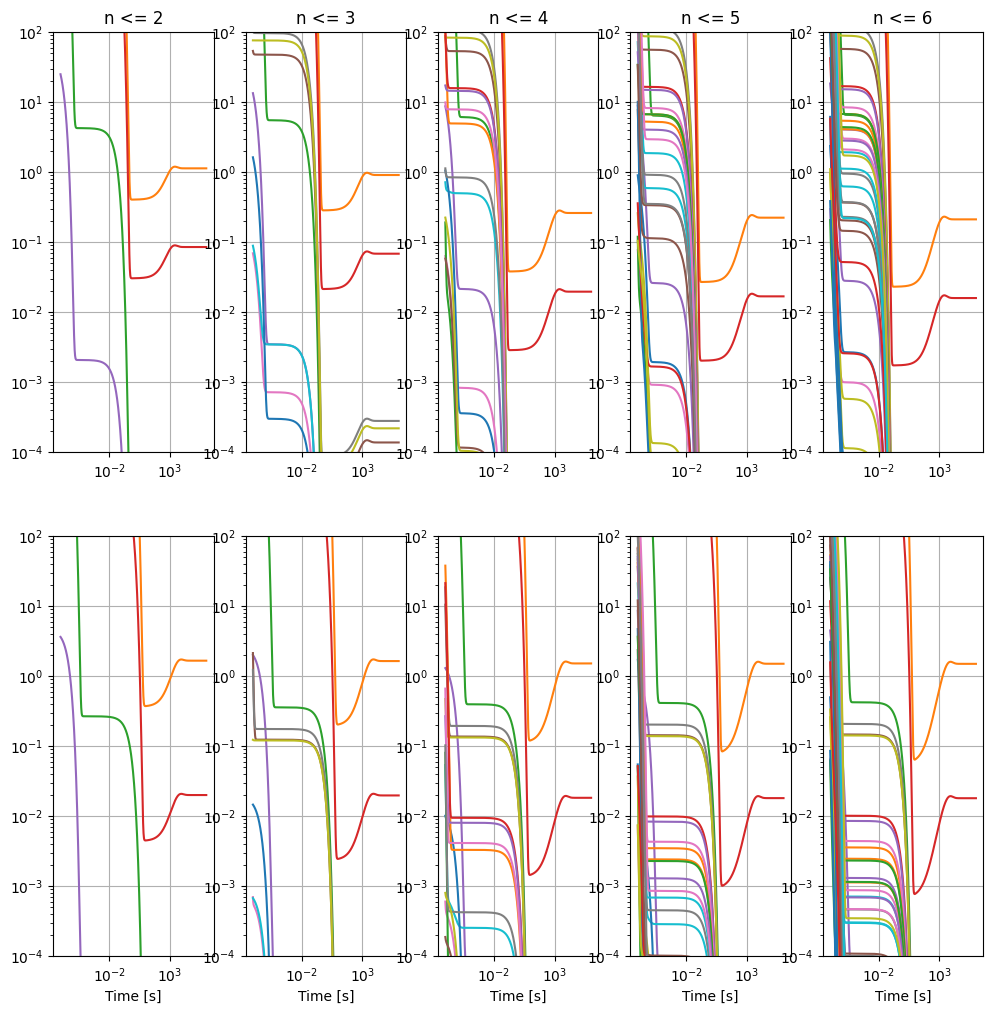

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(12,12))
for ax_col, max_n in zip(axes.T, [2,3,4,5, 6]):
    states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= max_n)
    for environment, ax in zip(environments, ax_col):
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
        t, y = nlte_solver.solve(np.geomspace(1e-6,1000000, 1000))
        ax.plot(t, y.T[:, :-2], label = states.names);
        ax.plot(t, y.T[:, -2:], linestyle="--", label  = ["HeII", "HeIII"]);
        ax.set_yscale("log")
        ax.set_xscale("log")
        #ax.set_ylabel(r"Population $[1/cm^3]$")
        ax.set_ylim(1e-4, 1e2)
        #ax.set_title(f"time = {environment.t_d} days, T = {environment.T_phot} K")
        
        ax.grid()
        #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
        #    print(name, amount)
    ax_col[0].set_title(f"n <= {max_n}")
    ax.set_xlabel("Time [s]")
plt.savefig("plots/time_evolution.png", dpi=300, bbox_inches="tight")

Max fluxes out of ortho for t_d=1.43 and n<=1 (n_23S=2.2387401547503067):
Collision                : 23S  -> 21S . Flux: 2.70e+01
Photoionization          : 23S  -> HeII. Flux: 6.15e+00
Collision                : 23S  -> 11S . Flux: 6.72e-01
Collision                : 23S  -> 21P . Flux: 1.84e-01
Radiative                : 23S  -> 21P . Flux: 4.14e-02
Max fluxes out of ortho for t_d=1.43 and n<=2 (n_23S=1.1322766231593087):
Collision                : 23S  -> 21S . Flux: 1.36e+01
Photoionization          : 23P  -> HeII. Flux: 7.10e+00
Radiative                : 23P  -> 11S . Flux: 5.65e+00
Photoionization          : 23S  -> HeII. Flux: 3.11e+00
Collision                : 23P  -> 21P . Flux: 2.28e+00
Max fluxes out of ortho for t_d=1.43 and n<=3 (n_23S=0.9089559705588809):
Collision                : 23S  -> 21S . Flux: 1.09e+01
Photoionization          : 23P  -> HeII. Flux: 5.70e+00
Radiative                : 23P  -> 11S . Flux: 4.53e+00
Radiative                : 33D  -> 21P . Flux: 3.3

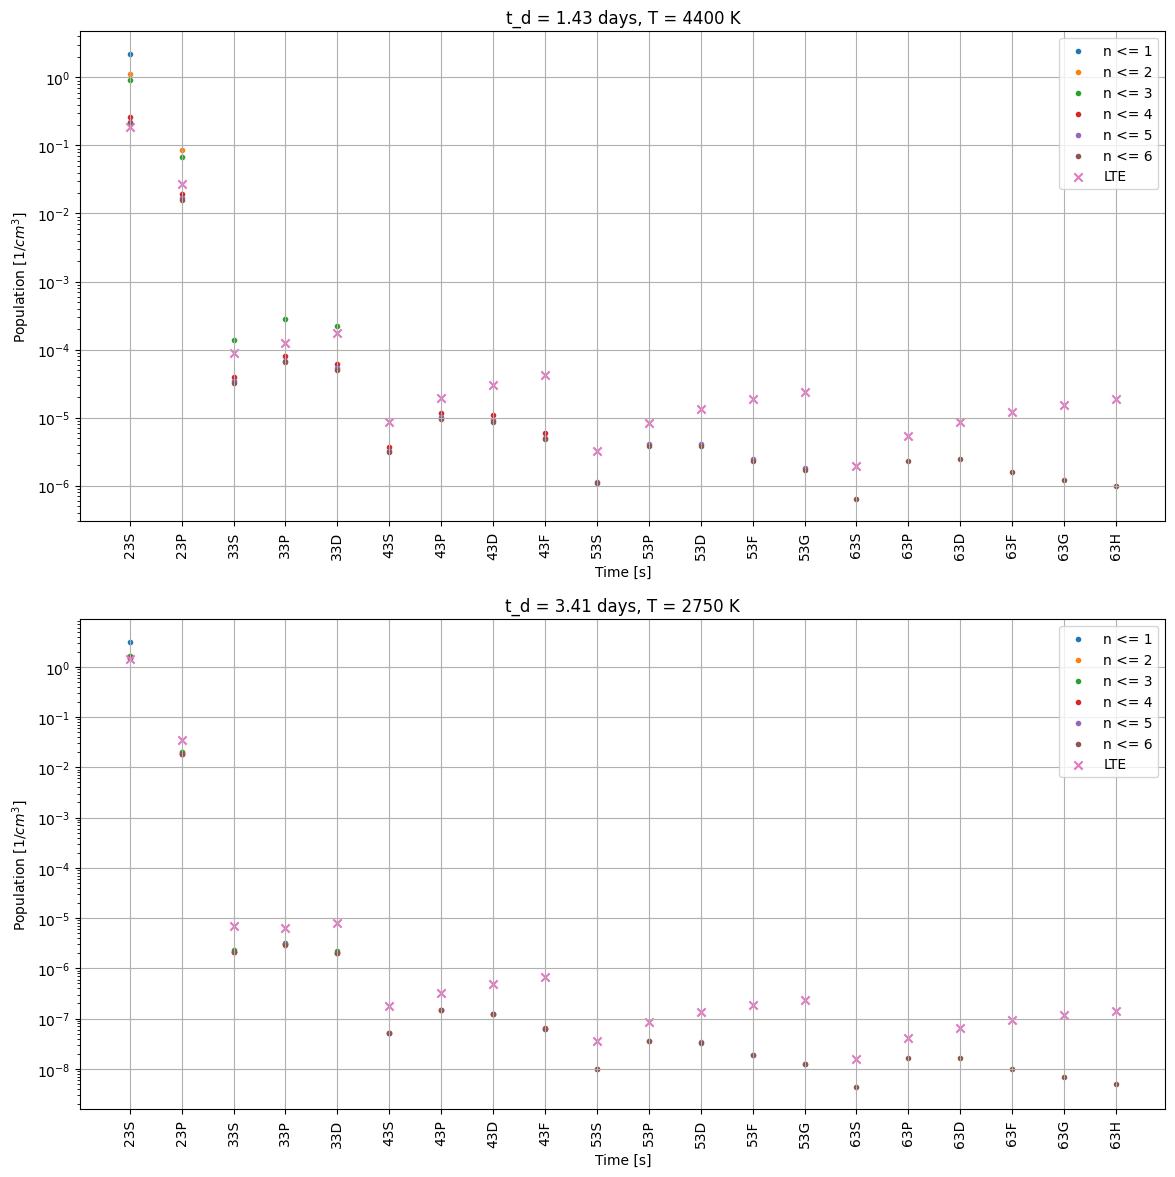

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(14,14))
for environment, ax in zip(environments, axes):
    for max_n in [1, 2,3,4,5, 6]:
        if max_n == 1:
            states = NLTE.NLTE_model.States.read_states(filter = lambda table: (table.index != "23P") & (table["n"] <= 2))
        else:
            states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= max_n)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
        #nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
        y = nlte_solver.solve(1e6)[1][:,-1]
        ortho_filter = np.array([name[-2] == "3" for name in states.all_names])
        ax.scatter(np.array(states.all_names)[ortho_filter], y[ortho_filter], marker=".", label = f"n <= {max_n}");
        if max_n == 6:
            ax.set_xticks(np.arange(sum(ortho_filter)))
            ax.set_xticklabels(np.array(states.all_names)[ortho_filter], rotation=90)

        i = 0
        all_fluxes = [(process.get_transition_rate_matrix() * y[None,:]) for process in nlte_solver.processes]
        all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
        max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)

        print(f"Max fluxes out of ortho for t_d={environment.t_d} and n<={max_n} (n_23S={y[1]}):")
        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                        i += 1
                        if i > 5:
                                break
                        print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")
    
    bolzman = states.multiplicities * np.exp(-states.energies / (const.k_B * environment.T_phot * u.K))
    lte_pop = bolzman[ortho_filter[:-2]] / np.sum(bolzman[ortho_filter[:-2]]) * y[1]
    ax.scatter(np.array(states.all_names)[ortho_filter], lte_pop, marker="x", label = f"LTE");

    ax.set_yscale("log")
    ax.legend()
    ax.set_ylabel(r"Population $[1/cm^3]$")
    #ax.set_ylim(1e-2, 1e4)
    ax.set_title(f"t_d = {environment.t_d} days, T = {environment.T_phot} K")
    
    ax.grid()
    ax.set_xlabel("Time [s]")


Max fluxes out of ortho for t_d=1.43 and n<=4 (n_23S=0.2607155553592624):
Radiative                : 43F  -> 31D . Flux: 1.84e+01
Radiative                : 33D  -> 41F . Flux: 7.42e+00
Collision                : 23S  -> 21S . Flux: 3.14e+00
Photoionization          : 23P  -> HeII. Flux: 1.64e+00
Radiative                : 23P  -> 11S . Flux: 1.30e+00
Max fluxes out of ortho for t_d=1.43 and n<=5 (n_23S=0.22342995725663484):
Radiative                : 43F  -> 31D . Flux: 1.57e+01
Radiative                : 33D  -> 41F . Flux: 6.35e+00
Collision                : 23S  -> 21S . Flux: 2.69e+00
Radiative                : 53F  -> 31D . Flux: 1.98e+00
Radiative                : 53F  -> 41D . Flux: 1.53e+00
Max fluxes out of ortho for t_d=1.43 and n<=6 (n_23S=0.21134266015835948):
Radiative                : 43F  -> 31D . Flux: 1.49e+01
Radiative                : 33D  -> 41F . Flux: 6.01e+00
Collision                : 23S  -> 21S . Flux: 2.55e+00
Radiative                : 53F  -> 31D . Flux: 1

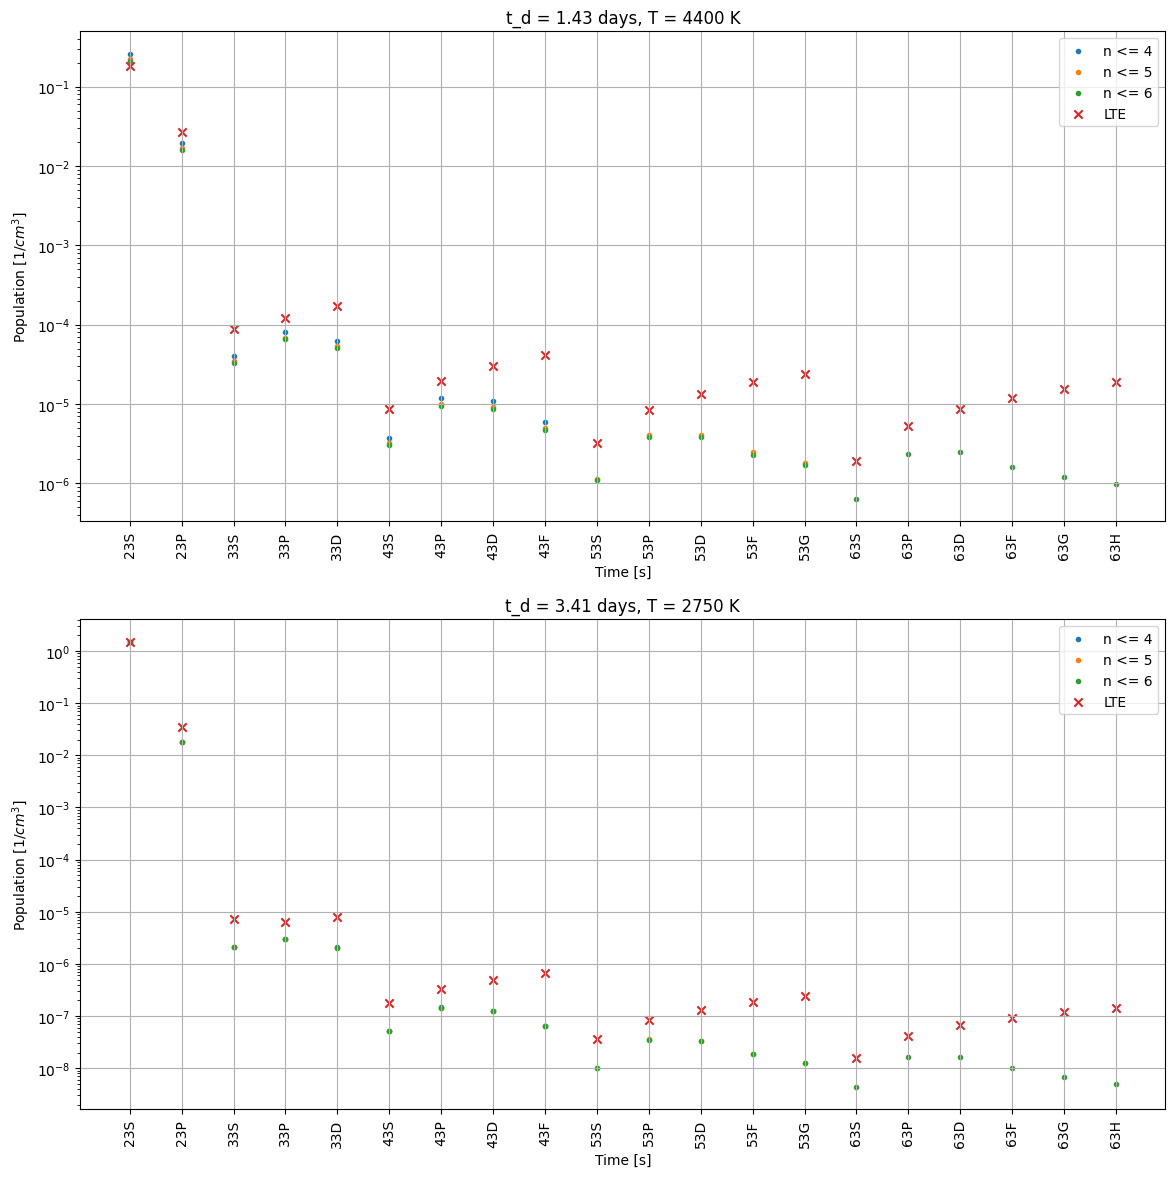

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(14,14))
for environment, ax in zip(environments, axes):
    for max_n in [4,5, 6]:
        if max_n == 1:
            states = NLTE.NLTE_model.States.read_states(filter = lambda table: (table.index != "23P") & (table["n"] <= 2))
        else:
            states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= max_n)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
        #nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
        y = nlte_solver.solve(1e6)[1][:,-1]
        ortho_filter = np.array([name[-2] == "3" for name in states.all_names])
        ax.scatter(np.array(states.all_names)[ortho_filter], y[ortho_filter], marker=".", label = f"n <= {max_n}");
        if max_n == 6:
            ax.set_xticks(np.arange(sum(ortho_filter)))
            ax.set_xticklabels(np.array(states.all_names)[ortho_filter], rotation=90)

        i = 0
        all_fluxes = [(process.get_transition_rate_matrix() * y[None,:]) for process in nlte_solver.processes]
        all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
        max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)

        print(f"Max fluxes out of ortho for t_d={environment.t_d} and n<={max_n} (n_23S={y[1]}):")
        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                        i += 1
                        if i > 5:
                                break
                        print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")
    
    bolzman = states.multiplicities * np.exp(-states.energies / (const.k_B * environment.T_phot * u.K))
    lte_pop = bolzman[ortho_filter[:-2]] / np.sum(bolzman[ortho_filter[:-2]]) * y[1]
    ax.scatter(np.array(states.all_names)[ortho_filter], lte_pop, marker="x", label = f"LTE");

    ax.set_yscale("log")
    ax.legend()
    ax.set_ylabel(r"Population $[1/cm^3]$")
    #ax.set_ylim(1e-2, 1e4)
    ax.set_title(f"t_d = {environment.t_d} days, T = {environment.T_phot} K")
    
    ax.grid()
    ax.set_xlabel("Time [s]")


In [6]:
states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= 2)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
print(nlte_solver.solve(1e6)[1][:,-1])
states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= 3)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
print(nlte_solver.solve(1e6)[1][:,-1])

[1.27872075e+04 1.66194670e+00 1.10787557e-05 2.00000582e-02
 1.61754378e-09 1.51026341e+05 6.88873664e+04]
[1.27828037e+04 1.64066104e+00 1.09674781e-05 1.97441636e-02
 1.62356592e-09 2.29451918e-06 7.80038700e-12 3.25973258e-06
 2.23941030e-06 9.96234057e-11 1.13507652e-11 1.51029380e+05
 6.88887526e+04]


In [7]:
NLTE.NLTE_model.get_ionization_dict().keys()

dict_keys(['11S', '21S', '31S', '41S', '51S', '61S', '71S', '81S', '91S', '101S', '21P', '31P', '41P', '51P', '61P', '71P', '81P', '91P', '31D', '41D', '51D', '61D', '71D', '81D', '91D', '101D', '41F', '51F', '61F', '71F', '81F', '91F', '101F', '51G', '61G', '71G', '81G', '91G', '101G', '61H', '71H', '81H', '91H', '101H', '71I', '81I', '91I', '101I', '23S', '33S', '43S', '53S', '63S', '73S', '83S', '93S', '103S', '23P', '33P', '43P', '53P', '63P', '73P', '83P', '93P', '103P', '33D', '43D', '53D', '63D', '73D', '83D', '93D', '103D', '43F', '53F', '63F', '73F', '83F', '93F', '103F', '53G', '63G', '73G', '83G', '93G', '103G', '63H', '73H', '83H', '93H', '103H', '73I', '83I', '93I', '103I', '83K', '93K', '103K'])

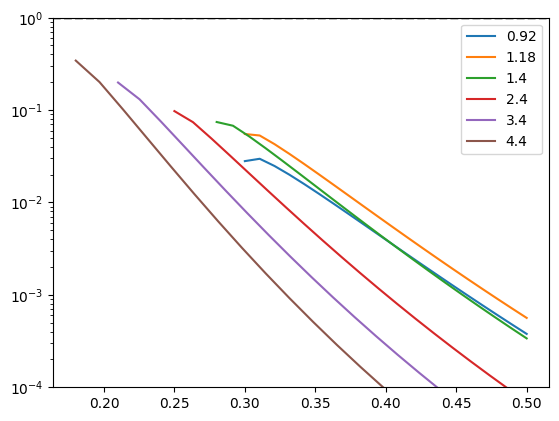

In [8]:

parameters = [{"T_phot": 5400, "photosphere_velocity": 0.3, "t_d": 0.92},
              {"T_phot": 4400, "photosphere_velocity": 0.3, "t_d": 1.18},
              {"T_phot": 4200, "photosphere_velocity": 0.28, "t_d": 1.4},
              {"T_phot": 3300, "photosphere_velocity": 0.25, "t_d": 2.4},
              {"T_phot": 3000, "photosphere_velocity": 0.21, "t_d": 3.4},
              {"T_phot": 2900, "photosphere_velocity": 0.18, "t_d": 4.4},
              ]
density_table = []
for params in parameters:
    velocities = np.linspace(params["photosphere_velocity"], 0.5, 20)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(**params, line_velocity= v)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
    density_table.append(np.array(densities))
    densities = np.array(densities)
    plt.plot(velocities, densities[:,1]/(7.4*params["t_d"]**-1), label = params["t_d"]);
    plt.yscale("log")
    plt.axhline(1, linestyle="--", color="black")
    #plt.xscale("log")
    plt.ylim(1e-4, 1e0)
    plt.legend()
    plt.grid()
    #for name, amount in zip(states.names + ["HeII", "HeIII"], y.T[-1]):
    #    print(name, amount)

Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 2.50e+01
Collision                : 23P  -> 21P . Flux: 4.19e+00
Collision                : 23P  -> 21S . Flux: 3.52e+00
Collision                : 23S  -> 11S . Flux: 6.23e-01
Collision                : 23S  -> 21P . Flux: 1.70e-01
Collision                : 33P  -> 31P . Flux: 3.72e-02
Collision                : 33P  -> 31S . Flux: 3.70e-02
Max fluxes out of ortho:
Photoionization          : 23P  -> HeII. Flux: 1.59e+01
Photoionization          : 23S  -> HeII. Flux: 6.96e+00
Photoionization          : 33P  -> HeII. Flux: 4.74e+00
Photoionization          : 33D  -> HeII. Flux: 2.17e+00
Photoionization          : 43P  -> HeII. Flux: 1.91e+00
Photoionization          : 43D  -> HeII. Flux: 1.37e+00
Collision                : 23S  -> 21S . Flux: 6.07e-01
Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 2.65e+00
Collision                : 23S  -> 11S . Flux: 2.35e-01
Collision                : 23

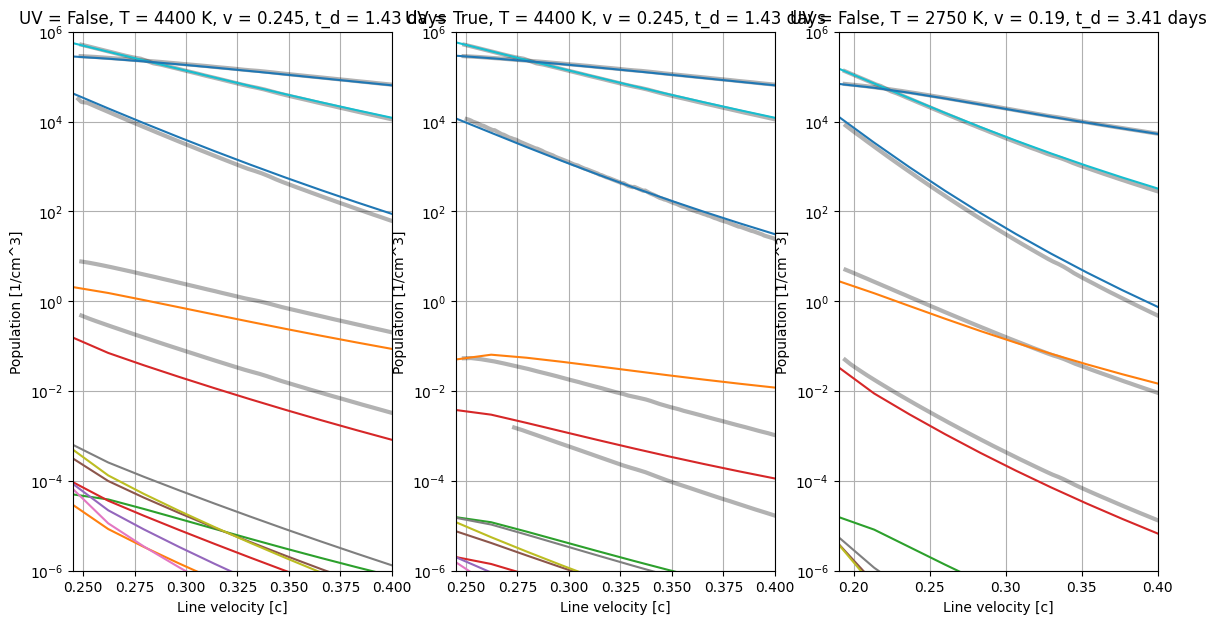

In [152]:
def plot_tarumi(ax, uv, T_phot, photosphere_velocity, t_d, states, print_exits = False):
    states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= 4)
    velocities = np.linspace(photosphere_velocity, 0.4, 10)
    densities = []
    for v in velocities:
        environment  = NLTE.NLTE_model.Environment(T_phot= T_phot, photosphere_velocity= photosphere_velocity, line_velocity= v, t_d=t_d)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
        if not uv:
            nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
        
        rad_process = nlte_solver.processes[1]
        idx_of = lambda x: nlte_solver.states.all_names.index(x)
        for a in ["23S", "23P", "33S", "33P", "33D", "43S", "43P", "43D", "43F"]:
            for b in ["11S", "21S", "21P", "31S", "31P", "31D", "41S", "41P", "41D", "41F"]:
                idx_a = idx_of(a)
                idx_b = idx_of(b)
                rad_process.A[idx_a, idx_b] = 0
                rad_process.A[idx_b, idx_a] = 0
                rad_process.arbsorbtion_rate[idx_a, idx_b] = 0
                rad_process.arbsorbtion_rate[idx_b, idx_a] = 0
                rad_process.stimulated_emission_rate[idx_a, idx_b] = 0
                rad_process.stimulated_emission_rate[idx_b, idx_a] = 0
        #nlte_solver.processes[2].ionization_rates[2:] = 0
        densities.append(nlte_solver.solve(1e7)[1][:, -1])
        

        if print_exits and v == velocities[0]:
            t, y = nlte_solver.solve(1e6)
            all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
            all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
            max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
            ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])
            print_count = 7
            i = 0
            print("Max fluxes out of ortho:")
            for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                    #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                    if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                            i += 1
                            if i > print_count:
                                    break
                            print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")

        
    for name, amount in zip(states.all_names, np.array(densities).T):
        ax.plot(velocities, amount, label=name)

fig, axes = plt.subplots(1, 3, figsize=(14,7))
states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= 4)
tarumi_state_arr = [["11S", "23P", "23S", "He+", "He2+"], ["11Swithout", "23Pwithout", "23Swithout", "He+", "He2+"], ["11S", "23P", "23S", "He+", "He2+"]]
for ax, uv, T_phot, photosphere_velocity, t_d, tarumi_states in zip(axes, [False, True, False], [4400, 4400, 2750], [0.245, 0.245, 0.190], [1.43, 1.43, 3.41], tarumi_state_arr):
    for name in tarumi_states:
        velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/{'Early' if t_d < 3 else 'Late'}{name}.csv", unpack=True, delimiter=";")
        ax.plot(velocity_23S, pops_23S, label=name, alpha=0.3, linewidth=3, color="k")
    plot_tarumi(ax, uv, T_phot, photosphere_velocity, t_d, states, print_exits = True)
    ax.set_title(f"UV = {uv}, T = {T_phot} K, v = {photosphere_velocity}, t_d = {t_d} days")
    ax.set_xlabel("Line velocity [c]")
    ax.set_ylabel("Population [1/cm^3]")
    ax.grid()
    ax.set_yscale("log")
    #ax.legend()
    ax.set_ylim(1e-6, 1e6)
    ax.set_xlim(photosphere_velocity, 0.4)

Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 9.99e+01
Collision                : 23P  -> 21P . Flux: 1.67e+01
Collision                : 23P  -> 21S . Flux: 1.40e+01
Collision                : 23S  -> 11S . Flux: 2.49e+00
Collision                : 23S  -> 21P . Flux: 6.80e-01
Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 7.81e+01
Collision                : 23P  -> 21P . Flux: 1.02e+01
Collision                : 23P  -> 21S . Flux: 8.54e+00
Collision                : 23S  -> 11S . Flux: 1.94e+00
Collision                : 23S  -> 21P . Flux: 5.31e-01
Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 5.92e+01
Collision                : 23P  -> 21P . Flux: 6.85e+00
Collision                : 23P  -> 21S . Flux: 5.76e+00
Collision                : 23S  -> 11S . Flux: 1.48e+00
Collision                : 23S  -> 21P . Flux: 4.03e-01
Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 4.48e+01
Coll

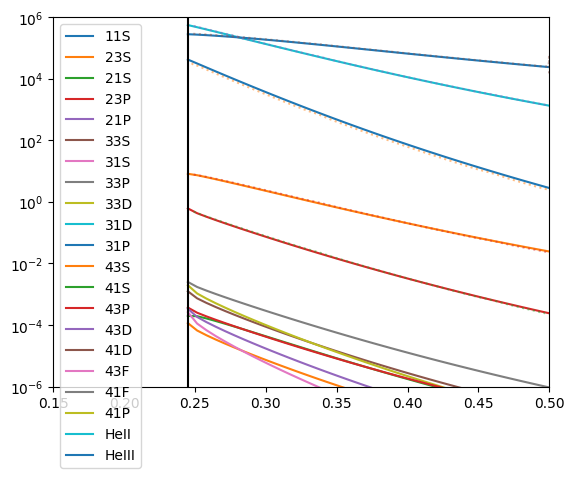

In [93]:
states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= 4)
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    
    rad_process = nlte_solver.processes[1]
    idx_of = lambda x: nlte_solver.states.all_names.index(x)

    for a in ["23S", "23P", "33S", "33P", "33D", "43S", "43P", "43D", "43F"]:
        for b in ["11S", "21S", "21P", "31S", "31P", "31D", "41S", "41P", "41D", "41F"]:
            idx_a = idx_of(a)
            idx_b = idx_of(b)
            rad_process.A[idx_a, idx_b] = 0
            rad_process.A[idx_b, idx_a] = 0
            rad_process.arbsorbtion_rate[idx_a, idx_b] = 0
            rad_process.arbsorbtion_rate[idx_b, idx_a] = 0
            rad_process.stimulated_emission_rate[idx_a, idx_b] = 0
            rad_process.stimulated_emission_rate[idx_b, idx_a] = 0
    #nlte_solver.processes[2].ionization_rates[2:] = 0
    densities.append(nlte_solver.solve(1e7)[1][:, -1])
    

    t, y = nlte_solver.solve(1e6)
    all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
    all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
    max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
    ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])
    print_count = 5
    i = 0
    print("Max fluxes out of ortho:")
    for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
            #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
            if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                    i += 1
                    if i > print_count:
                            break
                    print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")

    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = [["11S", "23P", "23S", "He+", "He2+"], ["11Swithout", "23Pwithout", "23Swithout", "He+", "He2+"], ["11S", "23P", "23S", "He+", "He2+"]]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

Max fluxes out of ortho:
Photoionization          : 23P  -> HeII. Flux: 1.40e+01
Photoionization          : 23S  -> HeII. Flux: 6.13e+00
Photoionization          : 33P  -> HeII. Flux: 4.18e+00
Radiative                : 43F  -> 31D . Flux: 3.04e+00
Photoionization          : 33D  -> HeII. Flux: 1.90e+00
Max fluxes out of ortho:
Photoionization          : 23P  -> HeII. Flux: 1.02e+01
Photoionization          : 23S  -> HeII. Flux: 5.77e+00
Photoionization          : 33P  -> HeII. Flux: 3.02e+00
Radiative                : 43F  -> 31D . Flux: 1.74e+00
Photoionization          : 43P  -> HeII. Flux: 1.23e+00
Max fluxes out of ortho:
Photoionization          : 23P  -> HeII. Flux: 7.49e+00
Photoionization          : 23S  -> HeII. Flux: 4.74e+00
Photoionization          : 33P  -> HeII. Flux: 2.20e+00
Radiative                : 43F  -> 31D . Flux: 1.13e+00
Photoionization          : 43P  -> HeII. Flux: 8.99e-01
Max fluxes out of ortho:
Photoionization          : 23P  -> HeII. Flux: 5.48e+00
Phot

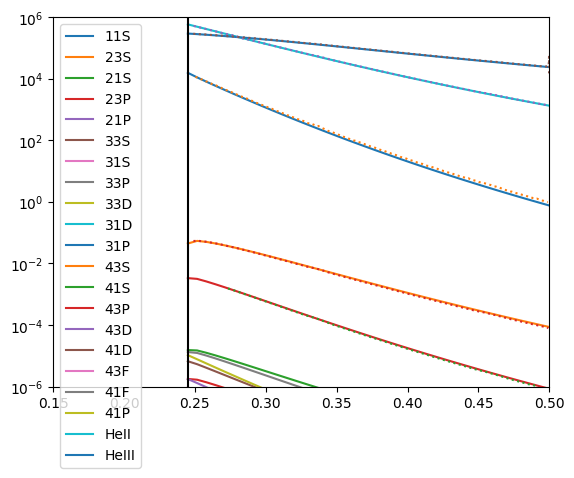

In [119]:
states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= 4)
velocities = np.linspace(0.245, 0.5, 40)
densities = []
for v in velocities:
    environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= v, t_d=1.43)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
    
    rad_process = nlte_solver.processes[1]
    idx_of = lambda x: nlte_solver.states.all_names.index(x)

    for a,b in [("23P", "11S"), ("23P", "21S"), ("23P", "21P"), ("23P", "21S"), ("23S", "21S"), ("23S", "21P") ]:
        idx_a = idx_of(a)
        idx_b = idx_of(b)
        rad_process.A[idx_a, idx_b] = 0
        rad_process.A[idx_b, idx_a] = 0
        rad_process.arbsorbtion_rate[idx_a, idx_b] = 0
        rad_process.arbsorbtion_rate[idx_b, idx_a] = 0
        rad_process.stimulated_emission_rate[idx_a, idx_b] = 0
        rad_process.stimulated_emission_rate[idx_b, idx_a] = 0
    #nlte_solver.processes[2].ionization_rates[2:] = 0
    densities.append(nlte_solver.solve(1e7)[1][:, -1])
    

    t, y = nlte_solver.solve(1e6)
    all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
    all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
    max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
    ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])
    print_count = 5
    i = 0
    print("Max fluxes out of ortho:")
    for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
            #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
            if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                    i += 1
                    if i > print_count:
                            break
                    print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")


    
for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)


tarumi_states = ["11Swithout", "23Pwithout", "23Swithout", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/Early{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=1, linestyle=":")
plt.xlim(0.15, 0.5)
plt.axvline(0.245, linestyle="-", color="black")

Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 2.29e+00
Radiative                : 43F  -> 31D . Flux: 2.98e-01
Collision                : 23S  -> 11S . Flux: 2.03e-01
Collision                : 23P  -> 21S . Flux: 1.94e-01
Collision                : 23P  -> 21P . Flux: 1.46e-01
Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 3.22e-01
Collision                : 23S  -> 11S . Flux: 2.86e-02
Collision                : 23P  -> 21S . Flux: 1.23e-02
Radiative                : 43F  -> 31D . Flux: 9.48e-03
Collision                : 23P  -> 21P . Flux: 9.30e-03
Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 4.57e-02
Collision                : 23S  -> 11S . Flux: 4.05e-03
Collision                : 23P  -> 21S . Flux: 1.18e-03
Collision                : 23P  -> 21P . Flux: 8.89e-04
Radiative                : 43F  -> 31D . Flux: 8.81e-04
Max fluxes out of ortho:
Collision                : 23S  -> 21S . Flux: 7.48e-03
Coll

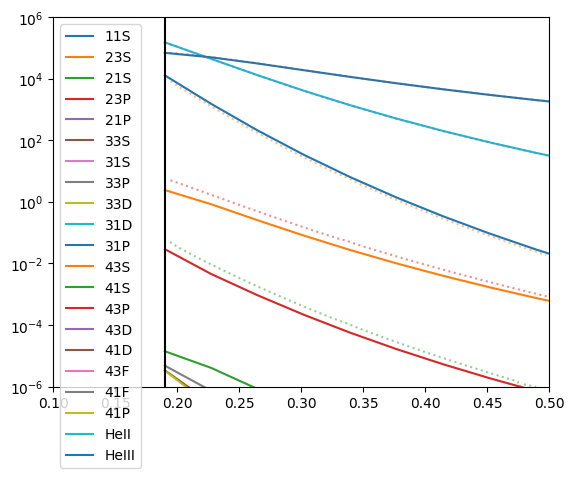

In [71]:
states = NLTE.NLTE_model.States.read_states(filter = lambda table: table["n"] <= 4)
velocities = np.linspace(0.19, 0.9, 20)
densities = []
for v in velocities:
    #states = NLTE.NLTE_model.States().filter(["11S", "23S", "21S", "23P", "21P", "33S"])
    environment  = NLTE.NLTE_model.Environment(T_phot= 2750, photosphere_velocity= 0.19, line_velocity= v, t_d= 3.41)
    nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states = states)
    nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
    
    rad_process = nlte_solver.processes[1]
    idx_of = lambda x: nlte_solver.states.all_names.index(x)

    for a,b in [("23P", "11S"), ("23P", "21S"), ("23P", "21P"), ("23P", "21S"), ("23S", "21S"), ("23S", "21P") ]:
        idx_a = idx_of(a)
        idx_b = idx_of(b)
        rad_process.A[idx_a, idx_b] = 0
        rad_process.A[idx_b, idx_a] = 0
        rad_process.arbsorbtion_rate[idx_a, idx_b] = 0
        rad_process.arbsorbtion_rate[idx_b, idx_a] = 0
        rad_process.stimulated_emission_rate[idx_a, idx_b] = 0
        rad_process.stimulated_emission_rate[idx_b, idx_a] = 0
    densities.append(nlte_solver.solve(1e7)[1][:, -1])


    t, y = nlte_solver.solve(1e6)
    all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
    all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
    max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
    ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])
    print_count = 5
    i = 0
    print("Max fluxes out of ortho:")
    for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
            #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
            if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                    i += 1
                    if i > print_count:
                            break
                    print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")



for name, amount in zip(states.all_names, np.array(densities).T):
    plt.plot(velocities, amount, label=name)
plt.yscale("log")
plt.legend()
plt.ylim(1e-6, 1e6)

tarumi_states = ["11S", "23P", "23S", "He+", "He2+"]
for name in tarumi_states:
    velocity_23S, pops_23S = np.loadtxt(f"Tarumi_densities/late{name}.csv", unpack=True, delimiter=";")
    plt.plot(velocity_23S, pops_23S, label=name, alpha=0.5, linestyle=":")
plt.xlim(0.1, 0.5)
plt.axvline(0.19, linestyle="-", color="black")

In [58]:

nlte_solver.processes

[<NLTE.NLTE_model.CollisionProcess object at 0x7f6bd81a9480>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f6bd818e8c0>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7f6bd818ffd0>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f6bd818fee0>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f6bd8000dc0>]
[<NLTE.NLTE_model.CollisionProcess object at 0x7f6bd8000430>, <NLTE.NLTE_model.RadiativeProcess object at 0x7f6bd8001e70>, <NLTE.NLTE_model.PhotoionizationProcess object at 0x7f6bd82882b0>, <NLTE.NLTE_model.RecombinationProcess object at 0x7f6bd828a950>, <NLTE.NLTE_model.HotElectronIonizationProcess object at 0x7f6bd80022c0>]


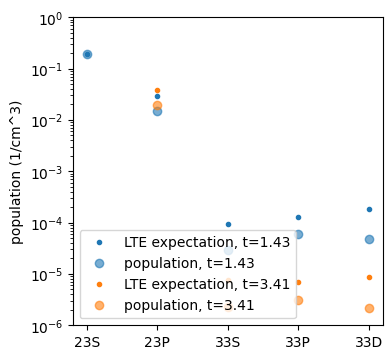

In [12]:

fig, ax1 = plt.subplots(1,1, figsize=(4,4))
for i, environment in enumerate(environments):
    nlte_solver = NLTE.NLTE_model.NLTESolver( environment)
    nlte_solver.processes = nlte_solver.processes
    t, y = nlte_solver.solve(1e6)
    print(nlte_solver.processes)
    ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])
    names = np.array(nlte_solver.states.all_names)[ortho_filter]
    ax1_left  = ax1
    p_i = nlte_solver.states.multiplicities * np.exp(-nlte_solver.states.energies / (const.k_B * nlte_solver.environment.T_electrons*u.K))
    p_i = p_i * y[1, -1] / p_i[1]
    ax1_left.plot(names,  p_i[ortho_filter[:-2]], ".", alpha=1, label=f"LTE expectation, t={environment.t_d}", color=f"C{i}")
    ax1_left.semilogy(names, y[ortho_filter, -1], "o", alpha=0.6, label=f"population, t={environment.t_d}", color=f"C{i}")
    ax1_left.legend(loc="lower left")
    ax1_left.set_ylim(1e-6, 1e0)
    ax1_left.set_ylabel("population (1/cm^3)")
plt.savefig("plots/ortho_population.png", dpi=300, bbox_inches="tight")


Max flux:
Radiative                : 23P  -> 23S . Flux: 1.56e+05
Radiative                : 23S  -> 23P . Flux: 1.56e+05
Radiative                : 23P  -> 33D . Flux: 1.94e+03
Radiative                : 33D  -> 23P . Flux: 1.94e+03
Max fluxes out of ortho:
Photoionization          : 23P  -> HeII. Flux: 1.56e+01
Photoionization          : 23S  -> HeII. Flux: 6.82e+00
Photoionization          : 33P  -> HeII. Flux: 4.74e+00
Collision                : 23S  -> 21S . Flux: 2.38e+00
Photoionization          : 33D  -> HeII. Flux: 2.14e+00
Radiative                : 23P  -> 11S . Flux: 9.86e-01
Radiative                : 33D  -> 21P . Flux: 7.20e-01
Photoionization          : 33S  -> HeII. Flux: 5.11e-01
Collision                : 23P  -> 21P . Flux: 3.98e-01
Collision                : 23P  -> 21S . Flux: 3.35e-01
Radiative                : 23P  -> 31D . Flux: 1.32e-01
Collision                : 23S  -> 11S . Flux: 5.93e-02
Collision                : 23S  -> 21P . Flux: 1.62e-02
Radiative    

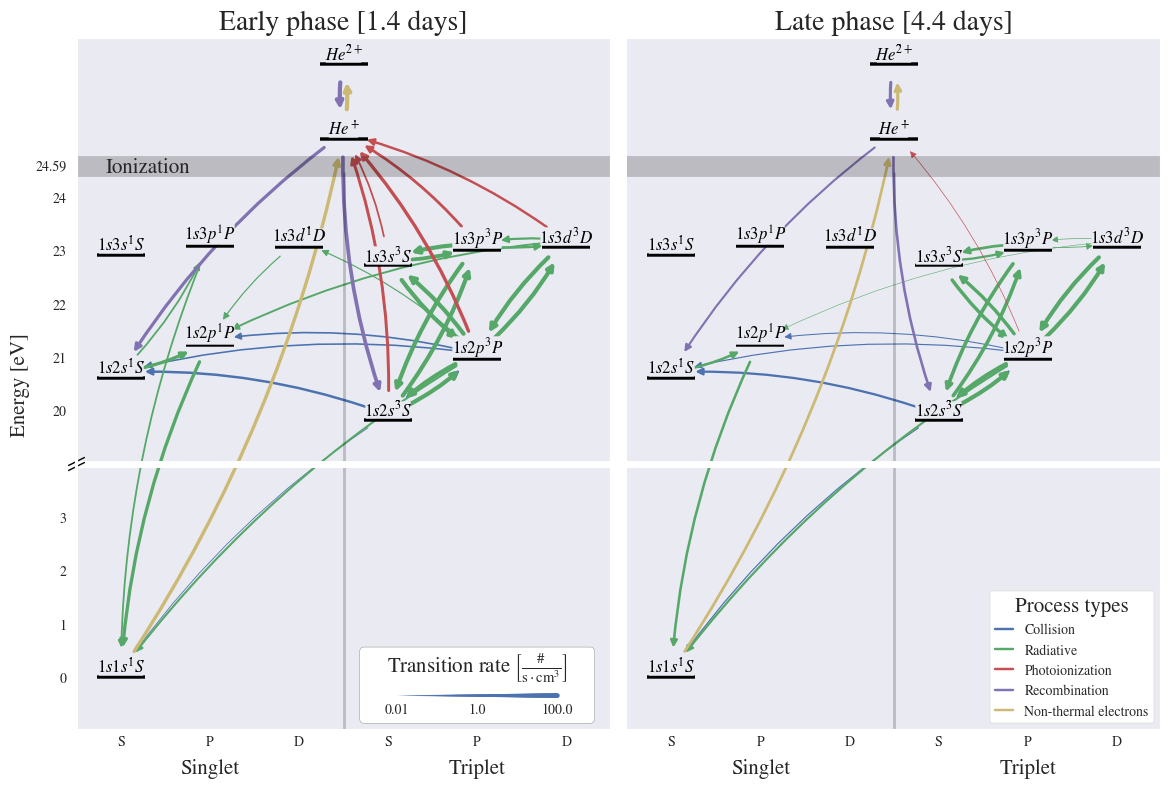

In [31]:
import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator


import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('seaborn-v0_8')


#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize, titlesize=None):
    if titlesize is None:
        titlesize = fontsize
    #plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.labelsize'] = fontsize
    plt.rcParams['axes.titlesize'] = titlesize
    plt.rcParams['legend.fontsize'] = ticksize
    plt.rcParams['legend.title_fontsize'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    plt.rcParams['figure.facecolor'] = 'white'
    #plt.rcParams['pcolor.shading'] = 'nearest'
    
reset_plt(10,15, 20)

print_count = 15

# A_{i,j} = rate to state i from state j 
#environments  = [NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43),
#                 NLTE.NLTE_model.Environment(T_phot= 2900, photosphere_velocity= 0.19, line_velocity=  0.19, t_d=4.43)]
fig, axes = plt.subplots(1, 2, sharey="row", figsize=(14,9), facecolor="white")
plt.subplots_adjust( wspace=0.03)
min_rate = 0.01
max_rate = 1e2
max_width = 3

for environment, ax, title in zip(environments, axes, ["Early phase [1.4 days]", "Late phase [4.4 days]"]):
        #plt.figure(figsize=(8,6))
        # make subplots with the second one being taller
        #fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,6), gridspec_kw={'height_ratios': [1, 2.5, 1.5]})
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        nlte_solver.processes = nlte_solver.processes
        states = nlte_solver.states
        t, y = nlte_solver.solve(1e6)
        all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
        all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
        max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
        i = 0
        print("Max flux:")
        ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])

        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")
                i += 1
                if i > 3:
                        break
        i = 0
        print("Max fluxes out of ortho:")
        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                        i += 1
                        if i > print_count:
                                break
                        print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")

        for i, process in enumerate(nlte_solver.processes):
                process_fluxes = (process.get_transition_rate_matrix() * y.T[-1][None,:]).T

                # give nodes the names states.names + ["HeII", "HeIII"]
                widths = np.interp(np.log10(np.maximum(process_fluxes, min_rate)), np.log10([min_rate, max_rate]), [0, max_width])
                widths = widths * (widths >= 0.3)
                        #np.log10([min_rate, max_rate]), [0, max_width], np.log10(process_fluxes)
                #widths = np.clip(np.log10(process_fluxes/max_flux)+dynamic_range, 0, 10)/dynamic_range*3
                #widths = np.clip(process_fluxes/max_flux * 5, 0, 10)
                G = nx.DiGraph(widths)
                # rename nodes:
                labels = {i:name for i, name in enumerate(np.array(nlte_solver.states.all_names))}
                G = nx.relabel_nodes(G, labels)
                weights = nx.get_edge_attributes(G,'weight').values()
                x_pos = {"11S": 0,  "21S": 0,   "31S": 0,
                                    "21P": 1,   "31P": 1, 
                                                "31D": 2, 
                                    "23S": 3,   "33S": 3,
                                    "23P": 4,   "33P": 4, 
                                                "33D": 5, 
                       }
                final_pos = {name: (x_pos[name], energy.value) for name, energy in zip(nlte_solver.states.all_names, nlte_solver.states.energies)} 
                final_pos["HeII"] = (2.5, 25.1) # add HeII and HeIII
                final_pos["HeIII"] = (2.5, 26.5)
                final_pos["11S"] = 0, 15      # modify 11S
                labels = {name: f"$1s{name[0]}{name[2].lower()}^{name[1]}{name[2]}$" for name in nlte_solver.states.names}
                labels["HeII"] = "$He^+$"
                labels["HeIII"] = "$He^{2+}$"
                #pos = nx.circular_layout(G)
                #nx.draw(G, final_pos, ax=ax,
                #        width=list(weights), edge_color=f'C{i}' ,connectionstyle="arc3,rad=0.1",
                #        with_labels=True, labels=labels, 
                #        node_color='k', node_shape="_", node_size=1200, font_size=10, font_weight="light", 
                #        verticalalignment="bottom", 
                #        bbox=dict(facecolor=ax.get_facecolor(), edgecolor = ax.get_facecolor(), boxstyle='square,pad=-0.1'))
                nx.draw_networkx_edges(G, {name: np.array([0,0.1])+final_pos[name] for name in final_pos}, ax=ax, width=list(weights), edge_color=f'C{i}', node_size=1200 ,connectionstyle="arc3,rad=0.1",)
                nx.draw_networkx_nodes(G, final_pos, ax=ax, node_color='k', node_shape="_", node_size=1200)
                nx.draw_networkx_labels(G, final_pos, ax=ax, labels=labels, font_weight="light", verticalalignment="bottom",
                                        bbox=dict(facecolor=ax.get_facecolor(), edgecolor = ax.get_facecolor(), boxstyle='square,pad=-0.1'))
                ax.plot([],[], color=f'C{i}', label=f'{process.name}')
        ax.set_ylim(14, 27)
        ax.plot([2.5, 2.5], [0,24.45], linestyle="-", linewidth=2, alpha=0.2, color="black")
        
        ax.tick_params(left=True, labelleft=True, labelbottom=True, bottom=True, which="both")
        
        ax.set_xlim(-0.5, 5.5)
        ax.set_ylim(14, 27)

        ax.axis("on")

        ax.set_yticks([final_pos["11S"][1], final_pos["11S"][1]+1, final_pos["11S"][1]+2, final_pos["11S"][1]+3, 19, 20, 21, 22, 23, 24, 24.59])
        ax.set_yticklabels([str(x - 15 if x < 20 else x).removesuffix(".0") if x != 19 else "" for x in ax.get_yticks()])


        ax.tick_params(axis='x', which='major', pad=20)
        ax.set_xticks([1.001, 3.999])
        ax.set_xticklabels(["Singlet", "Triplet"], fontsize=15)
        ax.minorticks_on()
        ax.set_xticks([0, 1, 2, 3, 4, 5], minor=True)

        ax.set_xticklabels(["S", "P", "D", "S", "P", "D"], minor=True)
        #plt.setp(ax.get_xticklabels(), rotation=0)
        ax.set_title(title)
        ax.grid()

ax.legend(loc="lower right", title="Process types", handlelength=1.3, facecolor="white", framealpha=1, frameon=True)

# make width scale
axes[0].scatter(np.linspace(0.6,0.9, 200),np.zeros(200)+0.05, s=np.linspace(0, max_width, 200)**2, alpha=1 , transform=axes[0].transAxes)
axes[0].text(0.6, 0.03, str(min_rate), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.75, 0.03, str(round((min_rate*max_rate)**0.5,3)), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.9, 0.03, str(max_rate), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.75, 0.09, r"Transition rate $\left[\frac{\text{#}}{\text{s}\cdot \text{cm}^3}\right]$", transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.title_fontsize'])
# draw white box containing the above scale, with rounded corners
axes[0].add_patch(matplotlib.patches.FancyBboxPatch((0.55, 0.03), 0.4, 0.07, transform=axes[0].transAxes, boxstyle="round,rounding_size=0.008,pad=0.02", fc="white", ec="gray", zorder=0))
        
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
        linestyle="none", color='k', mec='k', mew=1, clip_on=False)

axes[0].set_ylabel("Energy [eV]")
axes[0].axhline(24.59, linestyle="-", linewidth=15, alpha=0.2, color="black")
axes[1].axhline(24.59, linestyle="-", linewidth=15, alpha=0.2, color="black")
axes[0].axhline(19, linestyle="-", linewidth=5, color="white")
axes[1].axhline(19, linestyle="-", linewidth=5, color="white")
axes[0].text(0.3, 24.55, "Ionization", ha="center", va="center")
axes[0].plot([-0.5], [19+0.05], **kwargs)
axes[0].plot([-0.5], [19-0.05], **kwargs)
axes[1].tick_params(left=False, labelleft=False, which="both")
axes[1].spines.left.set_visible(False)
plt.savefig(f"plots/transition_rates.png", bbox_inches="tight", dpi=300)

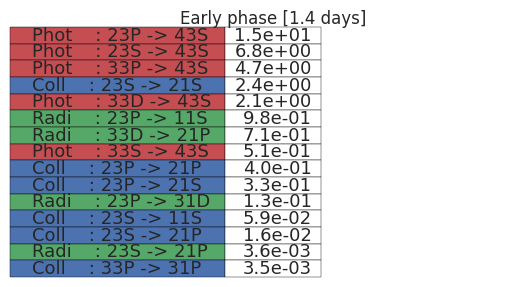

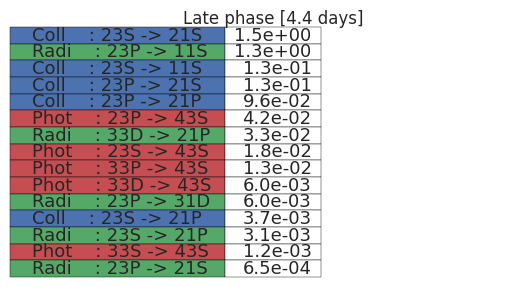

In [21]:
import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator


import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('seaborn-v0_8')

print_count = 15
for environment, title in zip(environments, ["Early phase [1.4 days]", "Late phase [4.4 days]"]):
        #plt.figure(figsize=(8,6))
        # make subplots with the second one being taller
        #fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,6), gridspec_kw={'height_ratios': [1, 2.5, 1.5]})
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
        nlte_solver.processes = nlte_solver.processes
        t, y = nlte_solver.solve(1e6)
        all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
        all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
        max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
        i = 0
        table = []
        labels = []
        colors = []
        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                        i += 1
                        if i > print_count:
                                break
                        labels.append(f"{nlte_solver.processes[process_idx].name[:4]:8s}: {states.all_names[origin_idx]} -> {states.all_names[destination_idx]}")
                        table.append([f"{all_fluxes[process_idx, destination_idx, origin_idx]:1.1e}"])
                        colors.append(f"C{process_idx}")
        plt.figure(figsize=(6,4))
        plt.grid()
        plt.subplots_adjust(left=0.1, right=0.9, bottom=0.4, top=1)
        plt.axis("off")
        plt.title(title)
        the_table = plt.table(cellText=table, rowColours=colors, rowLabels=labels, loc='center', colWidths=[0.2, 0.2, 0.2, 0.2])
        plt.savefig(f"plots/transition_rates_{title}.png", bbox_inches="tight", dpi=300)

for process Collision the max flux into ortho states is 0.005311606977784065, which is from state 21S to state 23S
for process Radiative the max flux into ortho states is 1.817497407404885e-05, which is from state 31D to state 23P
for process Photoionization the max flux into ortho states is 0.0, which is from state 11S to state 23S
for process Recombination the max flux into ortho states is 34.54969415727343, which is from state HeII to state 23S
for process Non-thermal electrons the max flux into ortho states is 0.0, which is from state 11S to state 23S


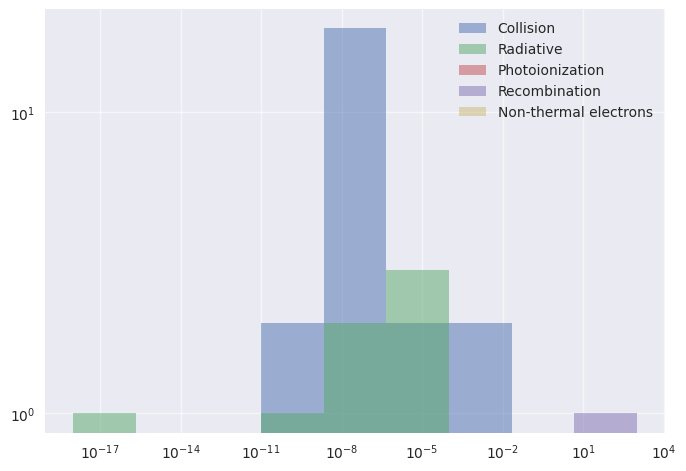

for process Collision the max flux out of ortho states is 2.3606771776474247, which is from state 23S to state 21S
for process Radiative the max flux out of ortho states is 0.9776222710680411, which is from state 23P to state 11S
for process Photoionization the max flux out of ortho states is 15.450558164736234, which is from state 23P to state HeII
for process Recombination the max flux out of ortho states is 0.0, which is from state 23S to state 11S
for process Non-thermal electrons the max flux out of ortho states is 0.00020519759035246898, which is from state 23S to state HeII


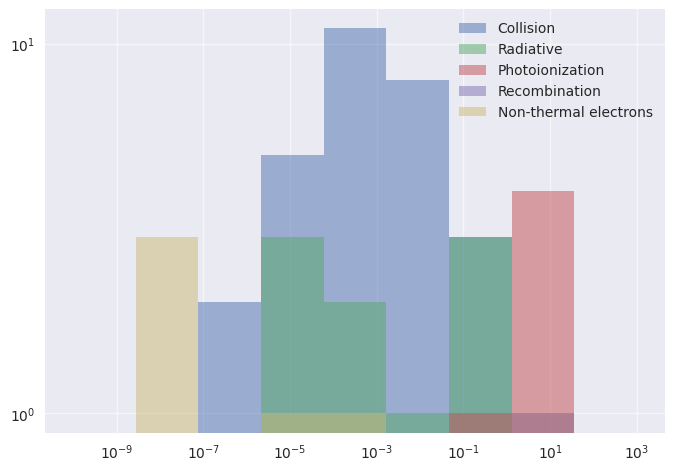

In [15]:
# make histogram of the flux sizes for each process
environment  = NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43)
nlte_solver = NLTE.NLTE_model.NLTESolver(environment)
#nlte_solver.processes = nlte_solver.processes[:2] + nlte_solver.processes[3:]
t, y = nlte_solver.solve(1000000)

ortho_states = np.array([name[1] == "3" for name in nlte_solver.states.all_names])
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    in_fluxes = fluxes[ortho_states, :][:, ~ortho_states]
    idx = np.unravel_index(np.argmax(in_fluxes), in_fluxes.shape)
    plt.hist(in_fluxes.flatten(), bins=np.geomspace(1e-18, 1000, 10), label=process.name, alpha=0.5, histtype="stepfilled")
    print(f"for process {process.name} the max flux into ortho states is {np.max(in_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[ortho_states][idx[0]]}")

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.show()
for process in nlte_solver.processes:
    fluxes =  process.get_transition_rate_matrix()* y.T[-1][None,:] 
    out_fluxes = fluxes[~ortho_states, :][:, ortho_states]
    idx = np.unravel_index(np.argmax(out_fluxes), out_fluxes.shape)
    plt.hist(out_fluxes.flatten(), bins=np.geomspace(1e-10, 1000, 10), label=process.name, alpha=0.5, histtype="stepfilled")
    print(f"for process {process.name} the max flux out of ortho states is {np.max(out_fluxes)}, which is from state {np.array(nlte_solver.states.all_names)[ortho_states][idx[1]]} to state {np.array(nlte_solver.states.all_names)[~ortho_states][idx[0]]}")
plt.legend()
plt.xscale("log")
plt.yscale("log")

/home/rasmus/.local/lib/python3.10/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/rasmus/.local/lib/python3.10/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


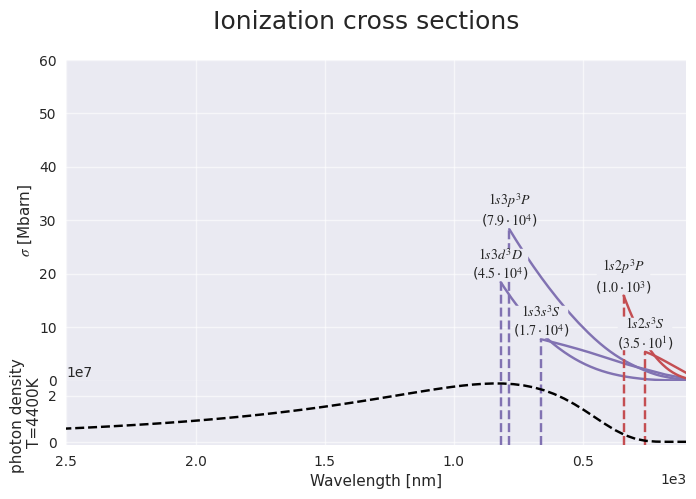

In [16]:
import NLTE.NLTE_model
ionization_rates = []
ionization_dict = NLTE.NLTE_model.get_ionization_dict()
spectrum = NLTE.NLTE_model.Environment().spectrum
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,5), sharex=True, height_ratios=[5, 1])
fancy_names = NLTE.NLTE_model.States().get_fancy_names()
format_latex_exponential = lambda x: f"${x:.1e}}}$".replace("e-0", "\cdot10^{-").replace("e+0", "\cdot10{^").replace("e+","\cdot10{^").replace("e-","\cdot10^{-")

for state in reversed(sorted(ionization_dict.keys())):
    if not (state[0] in "123" and state[1] == "3"):
        continue
    energies, crossection = ionization_dict[state]
    E = (energies * u.Ry).cgs
    nu = E.to(u.Hz, equivalencies=u.spectral()) 
    sigma = (crossection * u.Mbarn).cgs
    ionization_flux_article = u.sr * sigma
    x = E.to("nm", equivalencies=u.spectral()).value
    ax1.plot(x, crossection, label=state, color=f"C{state[0]}") 
    ax1.plot([x[0],x[0]], [0,crossection[0]], linestyle="--", color=f"C{state[0]}")
    ax2.axvline(x[[0]], linestyle="--", color=f"C{state[0]}")

    g = ("SPDFA".index(state[2])) *2 + 1
    lte_pop = g * np.exp(-(-E[0] + 0.3503019 * u.Ry)/(const.k_B*4400*u.K))
    ionization_flux_article = u.sr * sigma * (spectrum(nu)/E)
    #print(f"{state},\n R={np.trapz(x=nu, y=ionization_flux_article).to(1/u.s).value},\n LTE pop: {lte_pop.value}")
    ax1.text(x[[0]], crossection[0], f"{fancy_names[state]}\n({format_latex_exponential(np.trapz(x=nu, y=ionization_flux_article).to(1/u.s).value)})", 
             verticalalignment="bottom", horizontalalignment="center", fontsize=10,bbox=dict(facecolor=ax.get_facecolor(), edgecolor = ax.get_facecolor(), boxstyle='square,pad=-0.1'))


nm_range = np.linspace(100, 4000, 100) * u.nm
spectrum = BlackBody(4400 * u.K, scale=2*np.pi*u.Unit("erg/(s nm sr cm2)")) 
ax2.plot(nm_range, spectrum(nm_range)/nm_range.to("eV", equivalencies = u.spectral()), "--", color="black", alpha=1)
#spectrum = BlackBody(4400 * u.K, scale=2*np.pi*u.Unit("erg/(s nm sr cm2)")) 
#ax2.plot(nm_range, spectrum(nm_range)/nm_range.to("eV", equivalencies = u.spectral()), "--", color="black", alpha=1)

ax1.set_ylim(0, 6e1)
ax1.set_xlim(2500, 100)
plt.subplots_adjust(wspace=0, hspace=0)
plt.xlabel("Wavelength [nm]")
ax1.set_ylabel(r"$\sigma$ [Mbarn]")
ax2.set_ylabel("photon density \nT=4400K")
plt.suptitle("Ionization cross sections")
#ax1.yscale("log")
# plot spectrum on right axis
#plt.yscale("log")
#plt.ylim(0, 1e-1)
plt.savefig("plots/ionization_crosssections.png", dpi=300, bbox_inches="tight")

Max flux:
Radiative                : 23P  -> 23S . Flux: 9.41e+04
Radiative                : 23S  -> 23P . Flux: 9.40e+04
Radiative                : 23P  -> 33D . Flux: 1.17e+03
Radiative                : 33D  -> 23P . Flux: 1.16e+03
Max fluxes out of ortho:
Photoionization          : 23P  -> HeII. Flux: 9.41e+00
Radiative                : 43F  -> 31D . Flux: 8.37e+00
Photoionization          : 23S  -> HeII. Flux: 4.12e+00
Radiative                : 33D  -> 41F . Flux: 3.39e+00
Photoionization          : 33P  -> HeII. Flux: 2.87e+00
Collision                : 23S  -> 21S . Flux: 1.44e+00
Photoionization          : 33D  -> HeII. Flux: 1.28e+00
Photoionization          : 43P  -> HeII. Flux: 1.24e+00
Photoionization          : 43D  -> HeII. Flux: 8.38e-01
Radiative                : 23P  -> 11S . Flux: 5.96e-01
Radiative                : 33D  -> 21P . Flux: 4.31e-01
Photoionization          : 33S  -> HeII. Flux: 3.13e-01
Collision                : 23P  -> 21P . Flux: 2.41e-01
Collision    

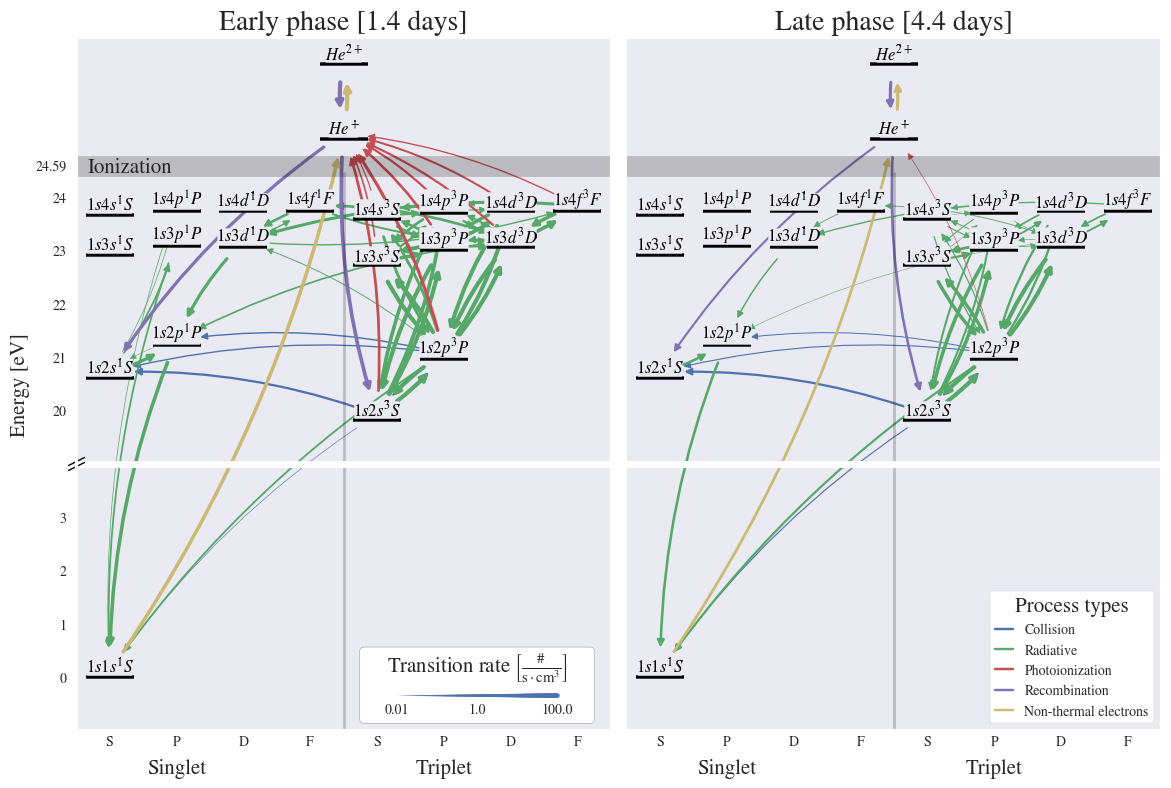

In [17]:
import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator


import networkx as nx
import NLTE.NLTE_model
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('seaborn-v0_8')


#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize, titlesize=None):
    if titlesize is None:
        titlesize = fontsize
    #plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['axes.labelsize'] = fontsize
    plt.rcParams['axes.titlesize'] = titlesize
    plt.rcParams['legend.fontsize'] = ticksize
    plt.rcParams['legend.title_fontsize'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    plt.rcParams['figure.facecolor'] = 'white'
    #plt.rcParams['pcolor.shading'] = 'nearest'
    
reset_plt(10,15, 20)

print_count = 15

# A_{i,j} = rate to state i from state j 
#environments  = [NLTE.NLTE_model.Environment(T_phot= 4400, photosphere_velocity= 0.245, line_velocity= 0.245, t_d=1.43),
#                 NLTE.NLTE_model.Environment(T_phot= 2900, photosphere_velocity= 0.19, line_velocity=  0.19, t_d=4.43)]
fig, axes = plt.subplots(1, 2, sharey="row", figsize=(14,9), facecolor="white")
plt.subplots_adjust( wspace=0.03)
min_rate = 0.01
max_rate = 1e2
max_width = 3

for environment, ax, title in zip(environments, axes, ["Early phase [1.4 days]", "Late phase [4.4 days]"]):
        #plt.figure(figsize=(8,6))
        # make subplots with the second one being taller
        #fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,6), gridspec_kw={'height_ratios': [1, 2.5, 1.5]})
        states = NLTE.NLTE_model.States.read_states(lambda table: table["n"] <= 4)
        nlte_solver = NLTE.NLTE_model.NLTESolver(environment, states=states)
        nlte_solver.processes = nlte_solver.processes
        t, y = nlte_solver.solve(1e6)
        all_fluxes = [(process.get_transition_rate_matrix() * y.T[-1][None,:]) for process in nlte_solver.processes]
        all_fluxes = np.array(all_fluxes)#[:,~ortho_filter][:,:, ortho_filter]
        max_index = np.unravel_index(np.argsort(-all_fluxes, axis=None), all_fluxes.shape)
        i = 0
        print("Max flux:")
        ortho_filter = np.array([x[1] == "3" for x in nlte_solver.states.all_names])

        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")
                i += 1
                if i > 3:
                        break
        i = 0
        print("Max fluxes out of ortho:")
        for process_idx, destination_idx, origin_idx in list(zip(*max_index)):
                #if states.all_names[origin_idx] in ["23S", "23P"] and not ortho_filter[destination_idx]:
                if ortho_filter[origin_idx] and not ortho_filter[destination_idx]:
                        i += 1
                        if i > print_count:
                                break
                        print(f"{nlte_solver.processes[process_idx].name:25s}: {states.all_names[origin_idx]:4} -> {states.all_names[destination_idx]:4}. Flux: {all_fluxes[process_idx, destination_idx, origin_idx]:.2e}")

        for i, process in enumerate(nlte_solver.processes):
                process_fluxes = (process.get_transition_rate_matrix() * y.T[-1][None,:]).T

                # give nodes the names states.names + ["HeII", "HeIII"]
                order= [0,2,4,6,9, 10,1, 3, 5, 7, 8, 11, 12]
                #order = np.arange(len(states.names) + 2)
                widths = np.interp(np.log10(np.maximum(process_fluxes, min_rate)), np.log10([min_rate, max_rate]), [0, max_width])
                widths = widths * (widths >= 0.3)
                        #np.log10([min_rate, max_rate]), [0, max_width], np.log10(process_fluxes)
                #widths = np.clip(np.log10(process_fluxes/max_flux)+dynamic_range, 0, 10)/dynamic_range*3
                #widths = np.clip(process_fluxes/max_flux * 5, 0, 10)
                G = nx.DiGraph(widths)
                # rename nodes:
                labels = {i:name for i, name in enumerate(np.array(nlte_solver.states.all_names))}
                G = nx.relabel_nodes(G, labels)
                weights = nx.get_edge_attributes(G,'weight').values()
                x_pos = {"11S": 0,  "21S": 0,   "31S": 0,
                                    "21P": 1,   "31P": 1, 
                                                "31D": 2, 
                                    "23S": 3,   "33S": 3,
                                    "23P": 4,   "33P": 4, 
                                                "33D": 5, 
                       }
                x_pos = {name: "SPDF".index(name[2]) + (4 if name[1] == "3" else 0) for name in states.names}
                final_pos = {name: (x_pos[name], energy.value) for name, energy in zip(nlte_solver.states.all_names, nlte_solver.states.energies)} 
                final_pos["HeII"] = (3.5, 25.1) # add HeII and HeIII
                final_pos["HeIII"] = (3.5, 26.5)
                final_pos["11S"] = 0, 15      # modify 11S
                labels = {name: f"$1s{name[0]}{name[2].lower()}^{name[1]}{name[2]}$" for name in nlte_solver.states.names}
                labels["HeII"] = "$He^+$"
                labels["HeIII"] = "$He^{2+}$"
                #pos = nx.circular_layout(G)
                #nx.draw(G, final_pos, ax=ax,
                #        width=list(weights), edge_color=f'C{i}' ,connectionstyle="arc3,rad=0.1",
                #        with_labels=True, labels=labels, 
                #        node_color='k', node_shape="_", node_size=1200, font_size=10, font_weight="light", 
                #        verticalalignment="bottom", 
                #        bbox=dict(facecolor=ax.get_facecolor(), edgecolor = ax.get_facecolor(), boxstyle='square,pad=-0.1'))
                nx.draw_networkx_edges(G, {name: np.array([0,0.1])+final_pos[name] for name in final_pos}, ax=ax, width=list(weights), edge_color=f'C{i}', node_size=1200 ,connectionstyle="arc3,rad=0.1",)
                nx.draw_networkx_nodes(G, final_pos, ax=ax, node_color='k', node_shape="_", node_size=1200)
                nx.draw_networkx_labels(G, final_pos, ax=ax, labels=labels, font_weight="light", verticalalignment="bottom",
                                        bbox=dict(facecolor=ax.get_facecolor(), edgecolor = ax.get_facecolor(), boxstyle='square,pad=-0.1'))
                ax.plot([],[], color=f'C{i}', label=f'{process.name}')
        ax.set_ylim(14, 27)
        ax.plot([3.5, 3.5], [0,24.45], linestyle="-", linewidth=2, alpha=0.2, color="black")
        
        ax.tick_params(left=True, labelleft=True, labelbottom=True, bottom=True, which="both")
        
        ax.set_xlim(-0.5, 7.5)
        ax.set_ylim(14, 27)

        ax.axis("on")

        ax.set_yticks([final_pos["11S"][1], final_pos["11S"][1]+1, final_pos["11S"][1]+2, final_pos["11S"][1]+3, 19, 20, 21, 22, 23, 24, 24.59])
        ax.set_yticklabels([str(x - 15 if x < 20 else x).removesuffix(".0") if x != 19 else "" for x in ax.get_yticks()])


        ax.tick_params(axis='x', which='major', pad=20)
        ax.set_xticks([1.001, 4.999])
        ax.set_xticklabels(["Singlet", "Triplet"], fontsize=15)
        ax.minorticks_on()
        ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7], minor=True)

        ax.set_xticklabels(["S", "P", "D", "F", "S", "P", "D", "F"], minor=True)
        #plt.setp(ax.get_xticklabels(), rotation=0)
        ax.set_title(title)
        ax.grid()

ax.legend(loc="lower right", title="Process types", handlelength=1.3, facecolor="white", framealpha=1, frameon=True)

# make width scale
axes[0].scatter(np.linspace(0.6,0.9, 200),np.zeros(200)+0.05, s=np.linspace(0, max_width, 200)**2, alpha=1 , transform=axes[0].transAxes)
axes[0].text(0.6, 0.03, str(min_rate), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.75, 0.03, str(round((min_rate*max_rate)**0.5,3)), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.9, 0.03, str(max_rate), transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.fontsize'])
axes[0].text(0.75, 0.09, r"Transition rate $\left[\frac{\text{#}}{\text{s}\cdot \text{cm}^3}\right]$", transform=axes[0].transAxes, ha="center", va="center", fontsize=plt.rcParams['legend.title_fontsize'])
# draw white box containing the above scale, with rounded corners
axes[0].add_patch(matplotlib.patches.FancyBboxPatch((0.55, 0.03), 0.4, 0.07, transform=axes[0].transAxes, boxstyle="round,rounding_size=0.008,pad=0.02", fc="white", ec="gray", zorder=0))
        
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
        linestyle="none", color='k', mec='k', mew=1, clip_on=False)

axes[0].set_ylabel("Energy [eV]")
axes[0].axhline(24.59, linestyle="-", linewidth=15, alpha=0.2, color="black")
axes[1].axhline(24.59, linestyle="-", linewidth=15, alpha=0.2, color="black")
axes[0].axhline(19, linestyle="-", linewidth=5, color="white")
axes[1].axhline(19, linestyle="-", linewidth=5, color="white")
axes[0].text(0.3, 24.55, "Ionization", ha="center", va="center")
axes[0].plot([-0.5], [19+0.05], **kwargs)
axes[0].plot([-0.5], [19-0.05], **kwargs)
axes[1].tick_params(left=False, labelleft=False, which="both")
axes[1].spines.left.set_visible(False)
plt.savefig(f"plots/transition_rates.png", bbox_inches="tight", dpi=300)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85],
 [Text(0, 0, '$1s2s^3S$'),
  Text(1, 0, '$1s2p^3P$'),
  Text(2, 0, '$1s3s^3S$'),
  Text(3, 0, '$1s3p^3P$'),
  Text(4, 0, '$1s3d^3D$'),
  Text(5, 0, '$1s4s^3S$'),
  Text(6, 0, '$1s4p^3P$'),
  Text(7, 0, '$1s4d^3D$'),
  Text(8, 0, '$1s4f^3F$'),
  Text(9, 0, '$1s5s^3S$'),
  Text(10, 0, '$1s5p^3P$'),
  Text(11, 0, '$1s5d^3D$'),
  Text(12, 0, '$1s5f^3F$'),
  Text(13, 0, '$1s5g^3G$'),
  Text(14, 0, '$1s6s^3S$'),
  Text(15, 0, '$1s6p^3P$'),
  Text(16, 0, '$1s6d^3D$'),
  Text(17, 0, '$1s6f^3F$'),

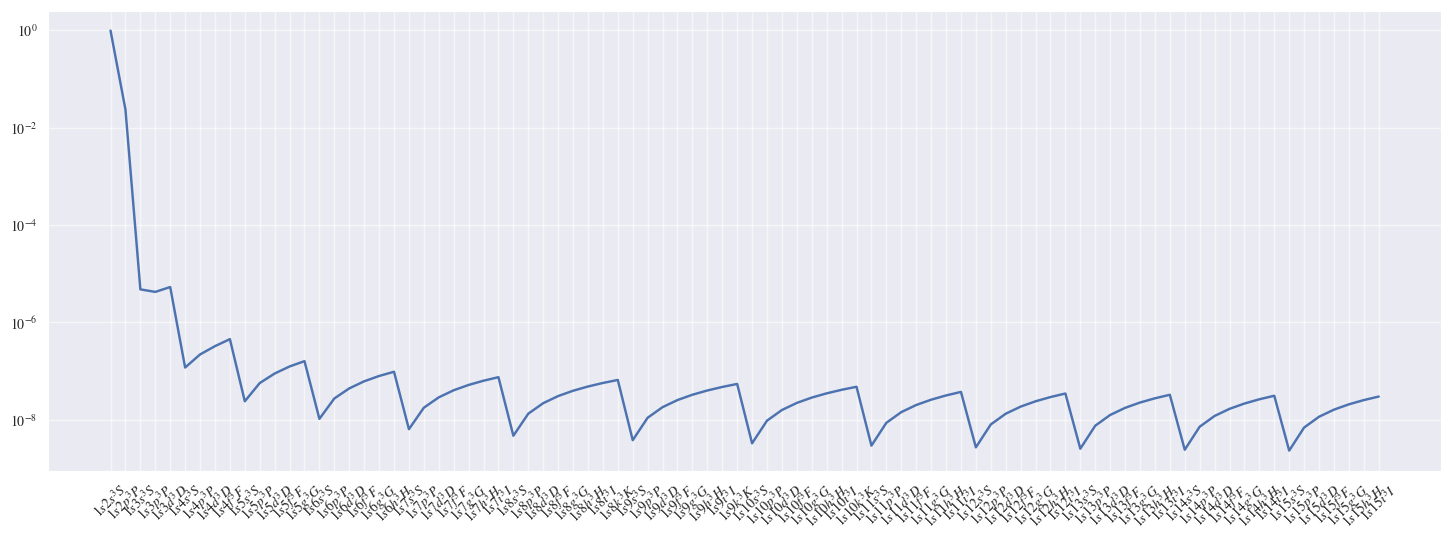

In [18]:
plt.figure(figsize=(18,6))
states = NLTE.NLTE_model.States.read_states(lambda table: (table["n"] <= 15))
ortho_filter = np.array([x[-2] == "3" for x in states.names])
lvl = states.multiplicities * np.exp(-(states.energies)/(const.k_B*2750*u.K))
lvl = lvl[ortho_filter]
lvl = lvl / np.sum(lvl)
plt.semilogy([value for key, value in states.get_fancy_names().items() if key[-2] == "3" ], lvl)
#rotate labels
plt.xticks(rotation=45)


In [19]:
nist_table = NLTE.NLTE_model.get_A_table()
A_coefficients = np.zeros((len(names), len(names)))
for row, ((lower_name, upper_name), subtable) in enumerate(nist_table.groupby(["lower_name", "upper_name"])):
    if not (lower_name in names and upper_name in names):
        continue
    print(lower_name, len(subtable))
    weighted_A = np.average(subtable["A_rates"], weights=subtable["g_k"])
    #if lower in names and upper in names:
    A_coefficients[names.index(lower_name),names.index(upper_name)] = weighted_A
plt.imshow(np.log(A_coefficients))
plt.xticks(range(len(names)), names, rotation=45)
plt.yticks(range(len(names)), names)
plt.grid()

23P 6


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
is_ortho = lambda names: np.array([x[-2] == "3" for x in names])
is_low_enough = lambda names: np.array([int(x[:-2]) < 7 for x in names])
# take a weighted mean of the A rates according to g_k
grouped = nist_table.groupby(["lower_name", "upper_name"])
# Make a dataframe with columns lower_name, upper_name, weighed average A_rates and the unique line_ref
weighted_A = grouped.apply(lambda x: np.average(x["A_rates"], weights=x["g_k"]))
ref = grouped.first()["line_ref"]
weighted_A = pandas.DataFrame({"A_rates": weighted_A, "line_ref": ref}).reset_index()

exit_pathways = weighted_A[(is_ortho(weighted_A["lower_name"]) != is_ortho(weighted_A["upper_name"])) &
                           is_low_enough(weighted_A["lower_name"]) & is_low_enough(weighted_A["upper_name"])]
#weighted_A.reset_index()

exit_pathways.sort_values("A_rates", ascending=False).head(30)

,lower_name,upper_name,A_rates,line_ref
94,31D,43F,2.830551e+06,
148,33D,41F,2.427550e+06,
99,31D,53F,7.700722e+05,
151,33D,51F,6.608500e+05,
200,41D,53F,4.414300e+05,
271,43D,51F,3.782950e+05,
103,31D,63F,3.219175e+05,
154,33D,61F,2.764750e+05,
205,41D,63F,1.950192e+05,
275,43D,61F,1.673200e+05,


In [ ]:
import os
os.environ['XUVTOP'] = "chianti"
import ChiantiPy.core as ch
import astropy.units as u
import numpy as np
 
helium = ch.ion('he_1', temperature=4400, eDensity=1e10, radTemperature=4400, rStar=1, verbose=1)
ortho_levels = [lvl for spin, lvl in zip(helium.Elvlc["spin"], helium.Elvlc["lvl"]) if spin == 3]
labels = {lvl: f"{name}^{spin}" for lvl, name, spin in zip(helium.Elvlc["lvl"], helium.Elvlc["term"], helium.Elvlc["spin"])}
#np.array(helium.Elvlc)[ortho_levels]
[(gf, labels[lvl1], labels[lvl2]) for gf, lvl1, lvl2 in zip(helium.Wgfa["gf"], helium.Wgfa["lvl1"], helium.Wgfa["lvl2"]) if ((lvl1 in ortho_levels) != (lvl2 in ortho_levels))]

[(0.0, '1s2^1', '1s.2s^3'), (3.58e-08, '1s2^1', '1s.2p^3')]

In [ ]:
(1869.724002 * (u.cm**-1)).to("Å", equivalencies=u.spectral())

<Quantity 53483.82964172 Angstrom>

In [ ]:
f12 = 1
nu = (1869.723 * u.cm**-1).to(u.Hz, equivalencies=u.spectral())
g_frac = 1
A = 2*np.pi*(nu * const.e.to("C"))**2/(const.eps0*const.m_e*const.c**3) * f12
A.si

<Quantity 2331829.37128175 1 / s>

In [ ]:
5/(4*(4-1)*3)

0.1388888888888889